In [132]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [133]:
df_train = pd.read_csv("dados/train.csv")
df_test = pd.read_csv('dados/test.csv')

In [134]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [135]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
df_train.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [137]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [138]:
round(df_train.isnull().sum() * 100 / len(df_train))

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [139]:
round(df_test.isnull().sum() * 100 / len(df_test))

PassengerId     0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            21.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          78.0
Embarked        0.0
dtype: float64

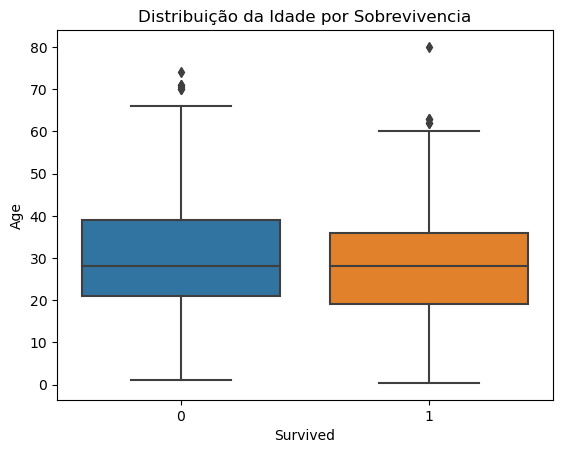

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Survived', y='Age', data=df_train)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Distribuição da Idade por Sobrevivencia')
plt.show()

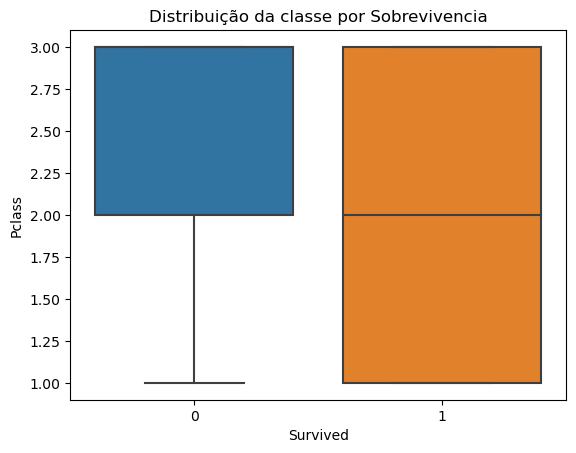

In [141]:
sns.boxplot(x='Survived', y='Pclass', data=df_train)
plt.xlabel('Survived')
plt.ylabel('Pclass')
plt.title('Distribuição da classe por Sobrevivencia')
plt.show()

In [142]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


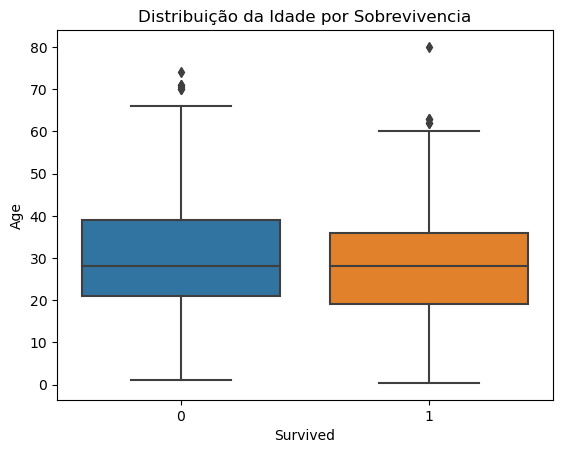

In [145]:
sns.boxplot(x='Survived', y='Age', data=df_train)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Distribuição da Idade por Sobrevivencia')
plt.show()

In [146]:
from scipy import stats

correlation, p_value = stats.pointbiserialr(df_train['Pclass'], df_train['Survived'])
print('Correlação de Ponto Bisserial:', correlation)
print('Valor-p:', p_value)

Correlação de Ponto Bisserial: -0.3384810359610153
Valor-p: 2.537047387978631e-25


#### Com isso chegamos na conclusao que  há uma relação significativa entre a classe (com valores 1, 2 e 3) e a sobrevivência (com valores 0 e 1).  A correlação negativa moderada sugere que classes mais altas podem estar associadas a uma menor probabilidade de sobrevivência.

In [147]:
correlation, p_value = stats.pointbiserialr(df_train['Fare'], df_train['Survived'])
print('Correlação de Ponto Bisserial:', correlation)
print('Valor-p:', p_value)

Correlação de Ponto Bisserial: 0.2573065223849624
Valor-p: 6.120189341917992e-15


#### Quanto mais caro o bilhete, maior chance de sobreviver

In [148]:
mean_age_train = df_train['Age'].mean()
df_train['Age'].fillna(mean_age_train, inplace=True)

mean_age_test = df_test['Age'].mean()
df_test['Age'].fillna(mean_age_test, inplace=True)

In [149]:
round(df_train.isnull().sum() * 100 / len(df_train))

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [150]:
round(df_train.isnull().sum() * 100 / len(df_train))

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [151]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### Transformando a coluna Sex para Male = 1 e female = 2

In [152]:
df_train['Sex'] = df_train['Sex'].map({'male': 1, 'female': 2})

df_test['Sex'] = df_test['Sex'].map({'male': 1, 'female': 2})

In [153]:
correlation, p_value = stats.pointbiserialr(df_train['Sex'], df_train['Survived'])
print('Correlação de Ponto Bisserial:', correlation)
print('Valor-p:', p_value)

Correlação de Ponto Bisserial: 0.543351380657755
Valor-p: 1.406066130878875e-69


#### Com isso, sabemos que as mulheres tem mais chances de sobreviver que os homens

## Terminando de organizar o DataFrame

In [154]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [155]:
df_train.drop('Cabin', axis = 1, inplace = True)

df_test.drop('Cabin', axis = 1, inplace = True)

In [156]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [157]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C


In [161]:
media_fare = df_train['Fare'].mean()

# Substituir os valores nulos pela média
df_test['Fare'].fillna(media_fare, inplace=True)

In [163]:
features_train = df_train[['Pclass', 'Sex', 'Fare']]
features_test = df_test[['Pclass', 'Sex', 'Fare']]
label_train = df_train['Survived']

In [164]:
X_train, X_val, y_train, y_val = train_test_split(features_train, label_train, test_size=0.2, random_state=45)

In [165]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(features_test)

In [166]:
rf = RandomForestClassifier()
rf.fit(X_train_normalized, y_train)

RandomForestClassifier()

In [167]:
predictions_val = rf.predict(X_val_normalized)
accuracy = accuracy_score(y_val, predictions_val)
print("Acurácia na validação:", accuracy)

Acurácia na validação: 0.8603351955307262


In [172]:
predictions_test = rf.predict(X_test_normalized)

In [173]:
submission_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions_test
})

In [174]:
submission_df.to_csv('submission.csv', index=False)

In [175]:
submission_df.shape

(418, 2)

# Redes neurais